In [1]:
import os
from os.path import join
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [35]:
#画像を取得 return 画像のテンソル, 画像のラベル番号
def get_img(path):
    img = Image.open(path)
    img = np.array(img, dtype=np.float32)
    return img

def make_batch(list_path_img):
    x_batch = []
    t_batch = []
    for path_img in list_path_img:
        img = get_img(path_img)
        img = np.array(img, dtype=np.float32)
        img = img.transpose(2, 0, 1)
        x_batch.append(img)
        a = str(path_img).split('/')[-2]
        a = int(a.split("_")[-1])
        t_batch.append(a)
        #print(a)
    return torch.tensor(x_batch), torch.tensor(t_batch)

size_batch = 10

img_w = 4
img_h = 4

# 学習データの学習回数
n_epoch = 3000

train_list = []
x_batch = [[] for i in range(n_epoch)]
t_batch = [[] for i in range(n_epoch)]

for time in range(n_epoch):
    for k in range(img_h):
        for m in range(img_w):
            for j in range(size_batch):
                train_list.append(f"E:/procon/data/4x4_v0/({k}, {m})_{k*img_w + m}/{time*size_batch + j}.jpg")
                #print(f"D:/procon_2021/data/16x16_v3/({k}, {m})_{k*img_w + m}/{i*size_batch + j}.jpg")
    x_batch[time], t_batch[time] = make_batch(train_list)
    train_list.clear()
    print(f"loading {time}")

print("loaded")

loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7
loading 8
loading 9
loading 10
loading 11
loading 12
loading 13
loading 14
loading 15
loading 16
loading 17
loading 18
loading 19
loading 20
loading 21
loading 22
loading 23
loading 24
loading 25
loading 26
loading 27
loading 28
loading 29
loading 30
loading 31
loading 32
loading 33
loading 34
loading 35
loading 36
loading 37
loading 38
loading 39
loading 40
loading 41
loading 42
loading 43
loading 44
loading 45
loading 46
loading 47
loading 48
loading 49
loading 50
loading 51
loading 52
loading 53
loading 54
loading 55
loading 56
loading 57
loading 58
loading 59
loading 60
loading 61
loading 62
loading 63
loading 64
loading 65
loading 66
loading 67
loading 68
loading 69
loading 70
loading 71
loading 72
loading 73
loading 74
loading 75
loading 76
loading 77
loading 78
loading 79
loading 80
loading 81
loading 82
loading 83
loading 84
loading 85
loading 86
loading 87
loading 88
loading 89
loading 90
loading 9

In [34]:
print(len(x_batch[1]))
print(len(t_batch[1]))

160


IndexError: list index out of range

In [32]:
class sellectionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4*4*3,48)# Input Layer to Intermediate modules
        self.fc2 = nn.Linear(48,48) #Intermediate modules to Output Layer
        self.fc3 = nn.Linear(48,24) #Intermediate modules to Output Layer
        self.fc4 = nn.Linear(24,24) #Intermediate modules to Output Layer
        self.fc5 = nn.Linear(24,16) #Intermediate modules to Output Layer
        self.fc6 = nn.Linear(16,16)

    def forward(self, x):#順伝播 Forward propagation
        x = x.view(-1,4*4*3)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        y = self.fc6(x)
        #y = nn.Softmax(self.fcp(x))
        return y


mymodel = MyNet2().to(device)
opt = optim.Adam(mymodel.parameters(), lr=0.005)

In [33]:
plot_x = []
# ロスと精度を保存するリスト（訓練用・テスト用）
list_loss_train = []
list_loss_test = []
list_acc_train = []
list_acc_test = []

temp_accs = []

i = 0
while i < n_epoch-10:    
    sum_loss = 0.
    sum_acc = 0.
    opt.zero_grad()
    x = x_batch[i].to(device)
    t = t_batch[i].to(device)
    y = mymodel(x)
    loss = F.cross_entropy(y, t)

    # 逆伝播
    
    loss.backward()

    

    # ロスと精度を蓄積
    sum_loss += loss.item()
    sum_acc += (y.max(1)[1] == t).sum().item()

    # パラメータ更新
    opt.step()
    #scheduler.step()

    mean_loss = sum_loss / len(x)
    mean_acc = sum_acc / len(x)
    list_loss_train.append(mean_loss)
    temp_accs.append(mean_acc)
    print(f"- now {i}")
    print("- mean loss:", mean_loss)
    print("- mean accuracy:", mean_acc) 
    # if i != 0 and i%10 == 0:
    #     list_acc_train.append(sum(temp_accs)/10)
    #     temp_accs.clear()
    #     plot_x.append(i)
    list_acc_train.append(mean_acc)
    plot_x.append(i)
    i += 1
      

print("fin v5 both steped")

print(list_acc_train)
print(f"max acc {max(list_acc_train)}")
print(f"-mean acc {sum(list_acc_train)/len(list_acc_train)}")
print(len(plot_x))
print(len(list_acc_train))
plt.plot(plot_x[:100],list_acc_train[:100])

IndexError: list index out of range

- now 0
- batch accuracy: 0.15625
- now 1
- batch accuracy: 0.16875
- now 2
- batch accuracy: 0.19375
- now 3
- batch accuracy: 0.15
- now 4
- batch accuracy: 0.13125
- now 5
- batch accuracy: 0.1875
- now 6
- batch accuracy: 0.13125
- now 7
- batch accuracy: 0.1875
- now 8
- batch accuracy: 0.1125
- now 9
- batch accuracy: 0.23125
-mean acc :0.165


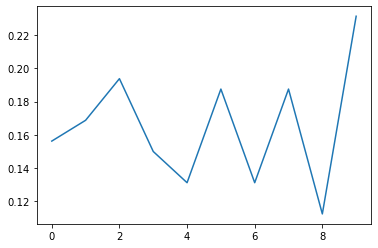

In [18]:
eve_accs = []
eve_x =[]

for i in range(10):
    sum_acc = 0.

    x_e = x_batch[-i].to(device)
    t_e = t_batch[-i].to(device)
    mymodel.eval()
    y = mymodel(x_e)
    sum_acc += (y.max(1)[1] == t).sum().item()
    mean_acc = sum_acc / len(x)
    eve_accs.append(mean_acc)
    eve_x.append(i)
    print(f"- now {i}")
    print("- batch accuracy:", mean_acc) 

print(f"-mean acc :{sum(eve_accs)/len(eve_accs)}")
plt.plot(eve_x,eve_accs)

In [29]:
eve_list = []


eve_list.append(f"E:/procon/data/4x4_v1/eve/1.jpg")
                #print(f"D:/procon_2021/data/16x16_v3/({k}, {m})_{k*img_w + m}/{i*size_batch + j}.jpg")
ex_batch = []
t_batch = []
for path_img in eve_list:
    img = get_img(path_img)
    img = np.array(img, dtype=np.float32)
    img = img.transpose(2, 0, 1)
    ex_batch.append(img)

a = torch.tensor(ex_batch)
x = a.to(device)
y = mymodel(x)
print(y)

tensor([[ 0.2637,  0.6120, -0.2135, -0.4171,  0.6267,  0.8639,  0.7248, -0.1642,
          0.4420,  0.9309,  0.2657,  0.0153, -0.0343, -0.1564, -2.1647, -1.1273]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [31]:
#モデルの保存
model_path = '4x4_sellect_v0_model.pth'
torch.save(mymodel.state_dict(), model_path)